# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

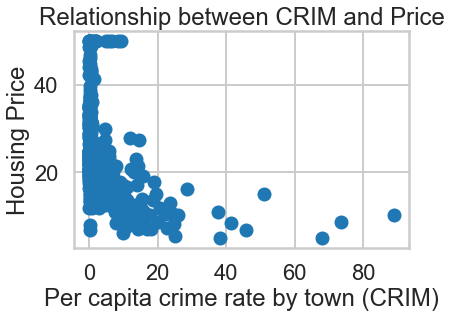

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
# sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

<p>There seems to be a strong relationship between high crime rates and low housing prices, but not the other way around.</p>
<p>Also most or all of the high crime towns seem to be outliers, as seen in the box plot below all towns with a crime rate
above 10 are beyond the maximum line, and the median line is almost exactly 0 as seen in the summary statistics previously.</p>
<p>For towns with a crime rate above 10 there seems to be the ending of an inverse exponential relationship between high crime
rates and low housing prices.</p>
<p>For towns with crime rates below 10 the scatterplot shows multiple clusters, one of towns with crime rates approaching 0
that have housing values covering almost the entire spectrum.</p>
<p>Another cluster groups towns that have housing prices that approach the maximum value but have crime rates covering the
spectrum between 0 and around 10.</p>
<p>And a cluster of towns that are on or below the trend line suggested by continuation of the trend displayed for towns with
crime rates above 10.</p>

Text(0.5,1,'Per capita crime rate by town (CRIM)')

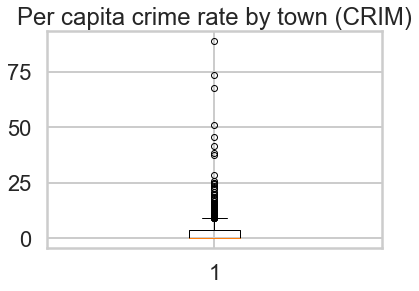

In [13]:
# your turn: describe relationship
plt.boxplot(bos.CRIM)
plt.title("Per capita crime rate by town (CRIM)")

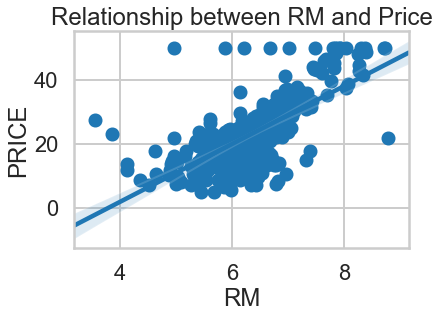

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

<p>Most towns seem to cluster in the range of prices below 40 and number of rooms per dwelling with a positive linear
relationship between them.</p>
<p>There are also a significant number of outliers near the maximum housing price with lower RM than expected.</p>

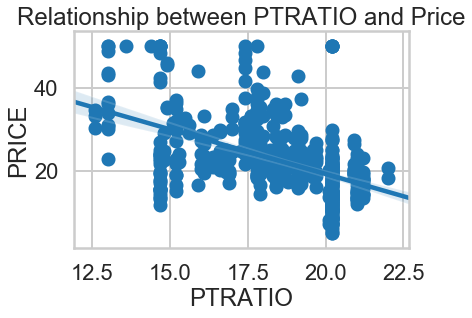

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)

<p>The plot shows a very unusual pattern of towns with identical or almost identical PTRATIO with varying price rates, this
could be the result of rounding in the reported PTRATIOs.</p>
<p>For PTRATIOs between 15 and 20 there seems to be a normal distribution peaking at PTRATIO 17.5 but it is more of an
illusion since that value corresponds closer to the first quartile, for towns with PTRATIO above the median 19 they cluster
around the mid to lower ends of the price range.</p>
<p>Overall there is a small linear relationship between higher PTRATIOs and lower housing prices.</p>

In [16]:
# To get a better idea of which variables would be significant we will rank by how much they correlate with the housing price
# in absolute terms as we are only interested on the magnitude of the correlation
bos.corr().abs().nlargest(14,['PRICE'])['PRICE']
# As we can observe, only three variables have a correlation above 50%, the two previously plotted and the % of lower status
# population (LSTAT), the rest of the variables below 50% would probably be best cut from our study but we will plot the ones
# above 40% to get a better idea.

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

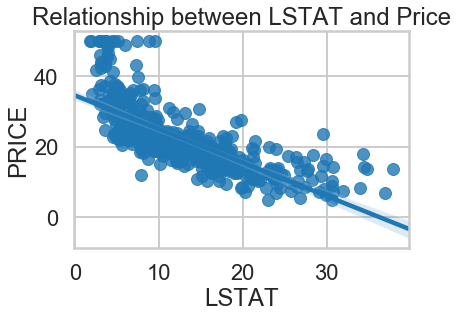

In [17]:
# We plot the % of lower status population (LSTAT) as related to house price
plt.title("Relationship between LSTAT and Price")
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)

<p>We observe a negative correlation with few strong outliers, mostly on the highest range of prices some tracts manage to have a lower status proportion up to 10%</p>

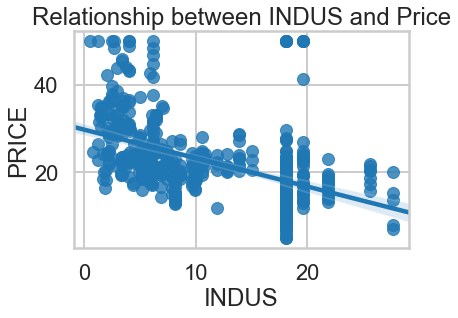

In [18]:
# We plot the proportion of non-retail business acres per town (INDUS) related to price
plt.title("Relationship between INDUS and Price")
sns.regplot(y="PRICE", x="INDUS", data=bos, fit_reg = True)

<p>The vertical lines observed on the plot seems to indicate that the INDUS values may have been rounded, which could have intoduced enough imprecisions to skew the relationship. This pattern could also be the result of tracts zoning their land very precisely to match thresholds set by a higher authority, though it would seem very unlikely in a place such as Boston with an irregular street grid and abundance of natural obstacles.</p>
<p>Not many strong outliers are observed, mostly on the higher pice range.</p>

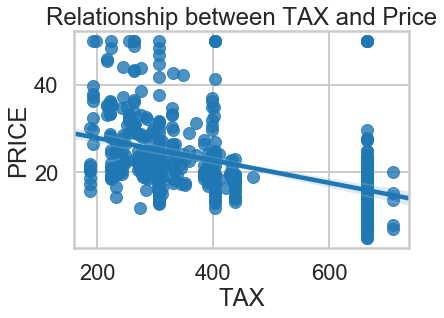

In [19]:
# We plot the full-value property-tax rate per $10,000 (TAX) compared to price
plt.title("Relationship between TAX and Price")
sns.regplot(y="PRICE", x="TAX", data=bos, fit_reg = True)

<p>We observe the same pattern of vertical lines as in the previous plot which could suggest rounding on the values but likely are the result of the different neighborhoods of Boston setting the same tax rate for all their census tracts.</p>
<p>We observe a few strong outliers on the higher range of prices as well as two clearly distinguished groupings in terms of tax rate, though both groupingns batch the trend line.</p>

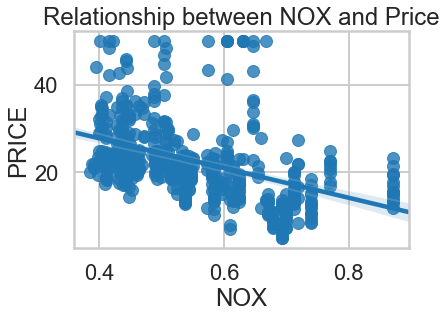

In [20]:
# We plot the nitric oxides concentration (parts per 10 million) (NOX) related to price
plt.title("Relationship between NOX and Price")
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)

<p>The same vertical line pattern is observed as in the previous plots probably because NOX measurements have not been made on all census tracts, with many having assigned the value of the closest tract or the neighborhood they belong to.</p>
<p>We observe a few major outliers on the higher price rate.</p>

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

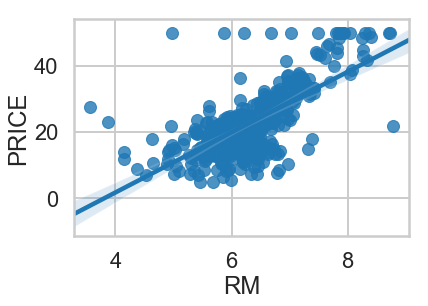

In [21]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


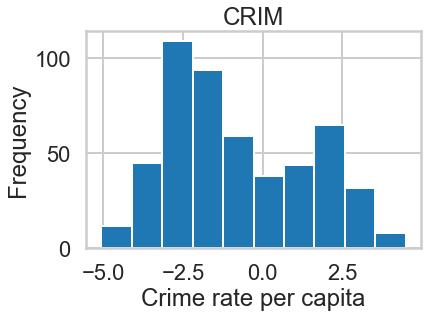

In [22]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

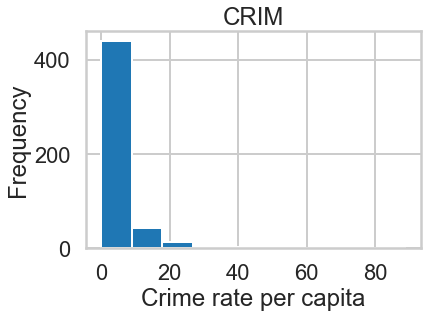

In [23]:
#your turn
# Without taking the logarithm the higher values are rendered invisible in the chart as they all are extreme outliers in the last
# quartile. If we view again the chart of the logarithm of CRIM we see that values of CRIM of 1 to 0 when taking the logarithm
# they become on or bellow 0 we can see that more than half of the original values are on or bellow 1, taking e to the power of
# the values in the logarithmic graph allows us to clearly see how uncommon are values above e^2.5=12.18 which we can clearly
# see in the non-logarithmic chart
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<p>A key issue to the accuracy of regression models is the skew of the independent variables, especially if the absolute skew is above 1 it can cause issues as when training the model some of the data will be trained less often.</p>
<p>Transforming the data to be more normal will be essential in some cases, tough depending on the nature of the skew especially if it is positive or negative different approaches are more appropriate.</p>
<p>To find which method is the best for each feature we created a function that will test which of the methods is the best at reducing skewness and at what rate it reduced it.</p>

In [24]:
import sys
def best_transformer_skew(df):
    keys = ['none','log','square root','cube root','square','reciprocal','box-cox','yeo-johnson','removing outliers']
    for key in df.keys():
        templist = []
        # we compute the skew with no transformation
        templist.append(stats.skew(df[key]))
        # With log transformation
        templist.append(stats.skew(np.log(df[key])))
        # Square root transformation
        templist.append(stats.skew(np.sqrt(df[key])))
        # Cubic root transformation
        templist.append(stats.skew(np.cbrt(df[key])))
        # Square transformation
        templist.append(stats.skew(np.square(df[key])))
        # Reciprocal transformation
        templist.append(stats.skew(np.reciprocal(df[key])))
        # Box-Cox transformation, we try except errors with values that won't possibly be the minimum
        try:
            templist.append(stats.skew(stats.boxcox(df[key])[0]))
        except:
            templist.append(100000)
        # Yeo-Johnson transformation
        templist.append(stats.skew(stats.yeojohnson(df[key])[0]))
        # Removing outliers
        translist = [x for x in stats.yeojohnson(bos.PTRATIO)[0] if (x > np.mean(df[key]) - 2 * np.std(df[key]))]
        translist = [x for x in translist if (x < np.mean(df[key]) + 2 * np.std(df[key]))]
        templist.append(stats.skew(translist))
        abstemplist = list(np.absolute(templist))
        print('The best transformation for', key, 'with original skew',round(templist[0],2), 'is', keys[abstemplist.index(min(abstemplist))], 'which has a skew of', round(templist[abstemplist.index(min(abstemplist))],2))

best_transformer_skew(bos)

The best transformation for CRIM with original skew 5.22 is box-cox which has a skew of 0.09
The best transformation for ZN with original skew 2.22 is yeo-johnson which has a skew of 1.07


C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Joan\Anaconda3\lib\site-packages\scipy\stats\stats.py:969: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in reciprocal


The best transformation for INDUS with original skew 0.29 is square root which has a skew of -0.07
The best transformation for CHAS with original skew 3.4 is none which has a skew of 3.4
The best transformation for NOX with original skew 0.73 is reciprocal which has a skew of -0.04
The best transformation for RM with original skew 0.4 is yeo-johnson which has a skew of 0.02
The best transformation for AGE with original skew -0.6 is square which has a skew of -0.18
The best transformation for DIS with original skew 1.01 is box-cox which has a skew of 0.03
The best transformation for RAD with original skew 1.0 is box-cox which has a skew of 0.02
The best transformation for TAX with original skew 0.67 is box-cox which has a skew of 0.08
The best transformation for PTRATIO with original skew -0.8 is yeo-johnson which has a skew of -0.22
The best transformation for B with original skew -2.88 is yeo-johnson which has a skew of -1.9
The best transformation for LSTAT with original skew 0.9 is 

<p>As seen on the results the box-cox and yeo-johnson methods were the ones that performed the best most of the times, though there were cases where other methods worked better and even one case like in CHAS where we couldn't find any method that improved the skewness, which is normal since it only took values of 1 and 0.</p>
<p>For some features like ZN and B the transformation didn't change the skew enough to fall below 1 thus more transformations should be applied, or should be discarded altogether.</p>
<p>We will now display the histograms of the selected variables with the appropriate transformations.</p>

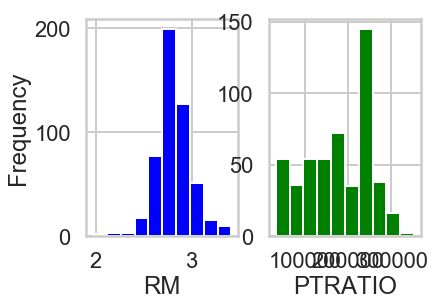

In [25]:
plt.subplot(1,2,1)
plt.hist(stats.yeojohnson(bos.RM)[0], color = 'b')
plt.xlabel("RM")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.xlabel("PTRATIO")
plt.hist(stats.yeojohnson(bos.PTRATIO)[0], color = 'g')
plt.show()

<p>We see the transformed RM and PTRATIO are not heavily skewed but PTRATIO has one grouping of values in the range that are overrepresented the skewness is still quite low at -0.22 it shouldn't cause too much of a problem.</p>

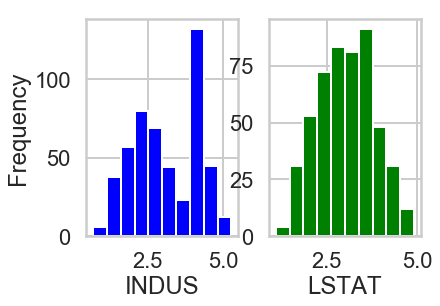

In [26]:
plt.subplot(1,2,1)
plt.hist(np.sqrt(bos.INDUS), color = 'b')
plt.xlabel("INDUS")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.xlabel("LSTAT")
plt.hist(stats.yeojohnson(bos.LSTAT)[0], color = 'g')
plt.show()

<p>Observing the two histograms we see LSTAT now looks quite normal but INDUS though looking overall quite normal it suffers from the same issue as PTRATIO, its overall skewness is a very low -0.07 so it shouldn't cause too much of an issue</p>

In [27]:
for key in bos.keys():
    print(key, 'has', stats.skew(bos[key]), 'skew')

CRIM has 5.222039072246122 skew
ZN has 2.219063057148425 skew
INDUS has 0.29414627684418543 skew
CHAS has 3.395799292642519 skew
NOX has 0.7271441597740319 skew
RM has 0.40241466802496245 skew
AGE has -0.5971855948016143 skew
DIS has 1.0087787565152246 skew
RAD has 1.0018334924536951 skew
TAX has 0.6679682687237768 skew
PTRATIO has -0.7999445320367449 skew
B has -2.8817983452627716 skew
LSTAT has 0.9037707431346133 skew
PRICE has 1.104810822864635 skew


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.49e-74
Time:                        15:33:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0,0.5,'Real Values')

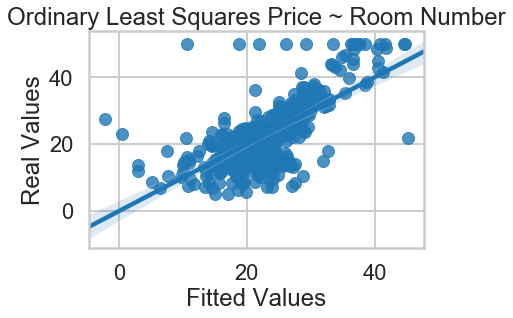

In [30]:
# your turn
sns.regplot(m.fittedvalues, bos.PRICE)
plt.title("Ordinary Least Squares Price ~ Room Number")
plt.xlabel("Fitted Values")
plt.ylabel("Real Values")

<p>The regression line matches a y=x slope, showing that overall the predictions by OLS are accurate but we see a few extreme outliers none the less.</p>

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
def normality_tester(data):
    """Runs normality tests on data and prints the results"""
    # we initialize the results counters
    null_fail_reject_counter = 0
    null_reject_counter = 0
    test_fail_reject_name = []
    test_reject_name = []
    # we will employ the Shapiro-Wilk test, using the standard alpha value of 0.05 as we want to avoid either type 1 and 2 errors
    stat, p = stats.shapiro(data)
    # Interpretation, null hypothesis is that the distribution came from a normally distributed population
    alpha = 0.05
    if p > 0.05:
        null_fail_reject_counter += 1
        test_fail_reject_name.append('Shapiro-Wilk')
    else:
        null_reject_counter += 1
        test_reject_name.append('Shapiro-Wilk')
    # We will also perfor a D'Agostino's K^2 test to find skew or kurtosis that could be enough to reject the null hypothesis
    stat, p = stats.normaltest(data)
    # Interpretation, same alpha
    if p > 0.05:
        null_fail_reject_counter += 1
        test_fail_reject_name.append('K^2')
    else:
        null_reject_counter += 1
        test_reject_name.append('K^2')
    # Just in case we could find any discrepancy we will employ another test the Anderson-Darling which we can employ 
    # in our case if the distribution could come from a normal distribution
    result = stats.anderson(data)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            null_fail_reject_counter += 1
            test_fail_reject_name.append('Anderson-Darling')
        else:
            null_reject_counter += 1
            test_reject_name.append('Anderson-Darling')
    # We remove duplicates from lists
    test_reject_name = list(dict.fromkeys(test_reject_name))
    test_fail_reject_name = list(dict.fromkeys(test_fail_reject_name))
    
    if null_fail_reject_counter == 0:
        print('Distribution most likely not normal, all tests failed')
        print('Tests failed:')
        print(test_reject_name)
    if null_reject_counter == 0:
        print('Distribution most likely normal, all tests succeded')
        print('Tests succeeded:')
        print(test_fail_reject_name)
    elif null_fail_reject_counter > null_reject_counter:
        print('Distribution probably normal, some tests failed')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    elif null_reject_counter > null_fail_reject_counter:
        print('Distribution probably not normal, most tests failed')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    elif null_fail_reject_counter == null_reject_counter:
        print('Results inconclussive, as many tests failed as succeeded')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    print('Total tests where null hypothesis was failed to be rejected = %.3f' % null_fail_reject_counter)
    print('Total tests where null hypothesis was rejected = %.3f' % null_reject_counter)
normality_tester(bos.RM)

Distribution most likely not normal, all tests failed
Tests failed:
['Shapiro-Wilk', 'K^2', 'Anderson-Darling']
Distribution probably not normal, most tests failed
Tests succeeded:
[]
Tests failed:
['Shapiro-Wilk', 'K^2', 'Anderson-Darling']
Total tests where null hypothesis was failed to be rejected = 0.000
Total tests where null hypothesis was rejected = 7.000


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [35]:
# your turn
# Would you recommend not having an intercept?
# Since not having an intercept would imply the Boston home price would be 0 as the value of the features fitted to the model are
# 0 we would have to investigate for which features that would make sense, looking at the description of the features in code
# cell 6 we see per capita crime rate would not make sense to be 0 as price is 0, most likely the complete opposite, this goes as
# well for ZN, INDUS, CHAS, NOX, AGE, DIS, PTRATIO, B and LSTAT.
# As for RM the concept of an intercept is meaningless as it is impossible to have a home without any room, thus forcing the
# intercept to be 0 would introduce inaccuracies unless the intercept happened to be 0.
# For the rate of property taxes per $10000 it would also be wrong to place the intercept at 0 since as seen here https://www.houselogic.com/finances-taxes/taxes/property-tax-exemptions/
# it is possible to be exempted from paying property taxes completely in some locales as in the example of Alaska for properties
# up to $150000 for the people that qualify, thus it would be inaccurate to state that only properties that are in such a bad
# shape and poor location that would make them basically worthless to be the only type of household to qualify for a full property
# tax exemption.
# Which leads us to the median value of owner occupied homes as a feature where it could make sense to fix the intercept to 0 as
# it relates to the value of property, but it poses a major issue in census tracts where a large portion of properties are
# not owner occupied, such as places where there are a high portion of rental appartments or places with many summer homes.
# We will test in any case which model is more accurate just in case.
# We set fit_intercept to False in order to not fit an intercept term
lm0 = LinearRegression(fit_intercept=False)
lma = LinearRegression()    
lm0.fit(X, bos.PRICE)    
lma.fit(X, bos.PRICE)    
print('Score with no intercept:', lm0.score(X, bos.PRICE), 'with intercept:', lma.score(X, bos.PRICE))
# As we can see the model with an itercept is more accurate than the one without an intercept.

Score with no intercept: 0.713663902104 with intercept: 0.740607742865


<p>Before discussing whether or not it is enough that the residuals are normaly distributed for the model to follow the i.i.d condition, we will first see how we can find if the residuals are normaly distributed for the different variables and by how much the transformations recommended by our previous best_transformer_skew function we will create a function that applies those optimum transformations.</p>

In [36]:
# Function that applies optimum tansformations to reduce skewness in the independent variables
def skew_transformer(df):
    keys = ['none','log','square root','cube root','square','reciprocal','box-cox','yeo-johnson','removing outliers']
    lists = []
    df_copy = pd.DataFrame().reindex_like(df)
    for key in df.keys():
        templist = []
        transforms = []
        # we compute the skew with no transformation
        transforms.append(df[key])
        templist.append(stats.skew(df[key]))
        # With log transformation
        transforms.append(np.log(df[key]))
        templist.append(stats.skew(np.log(df[key])))
        # Square root transformation
        transforms.append(np.sqrt(df[key]))
        templist.append(stats.skew(np.sqrt(df[key])))
        # Cubic root transformation
        transforms.append(np.cbrt(df[key]))
        templist.append(stats.skew(np.cbrt(df[key])))
        # Square transformation
        transforms.append(np.square(df[key]))
        templist.append(stats.skew(np.square(df[key])))
        # Reciprocal transformation
        transforms.append(np.reciprocal(df[key]))
        templist.append(stats.skew(np.reciprocal(df[key])))
        # Box-Cox transformation, we try except errors with values that won't possibly be the minimum
        try:
            transforms.append(stats.boxcox(df[key])[0])
            templist.append(stats.skew(stats.boxcox(df[key])[0]))
        except:
            transforms.append(1)
            templist.append(100000)
        # Yeo-Johnson transformation
        transforms.append(stats.yeojohnson(df[key])[0])
        templist.append(stats.skew(stats.yeojohnson(df[key])[0]))
        # Removing outliers
        translist = [x for x in stats.yeojohnson(bos.PTRATIO)[0] if (x > np.mean(df[key]) - 2 * np.std(df[key]))]
        translist = [x for x in translist if (x < np.mean(df[key]) + 2 * np.std(df[key]))]
        transforms.append(translist)
        templist.append(stats.skew(translist))
        abstemplist = list(np.absolute(templist))
        df_copy[key] = transforms[abstemplist.index(min(abstemplist))]
    return df_copy
# We create the new independent variables
newX = skew_transformer(bos).drop('PRICE', axis = 1)
# We observe by how much they correlate with home price
newX.join(bos.PRICE).corr().abs().nlargest(14,['PRICE'])['PRICE']

C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Joan\Anaconda3\lib\site-packages\scipy\stats\stats.py:969: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)
C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in reciprocal
C:\Users\Joan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in reciprocal


PRICE      1.000000
LSTAT      0.803443
RM         0.676939
PTRATIO    0.511193
INDUS      0.507810
TAX        0.473254
CRIM       0.440974
NOX        0.428083
AGE        0.391466
ZN         0.375807
RAD        0.330144
B          0.324452
DIS        0.296484
CHAS       0.175260
Name: PRICE, dtype: float64

<p>We see the rate of correlation has improved for most variables after transformation

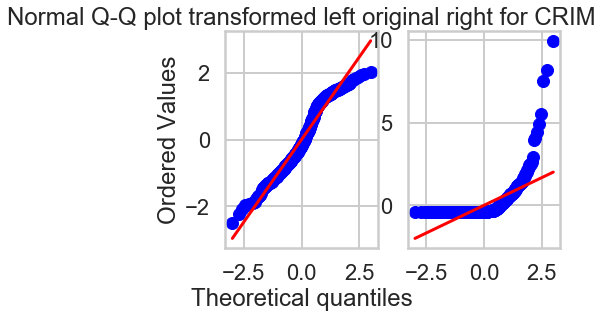

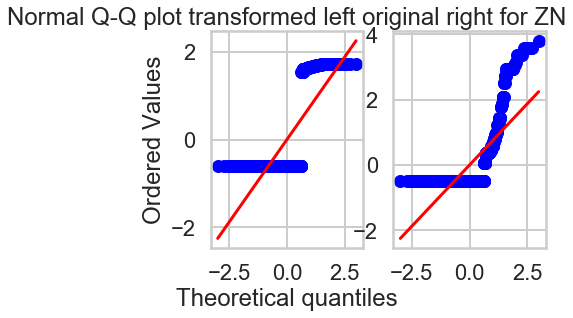

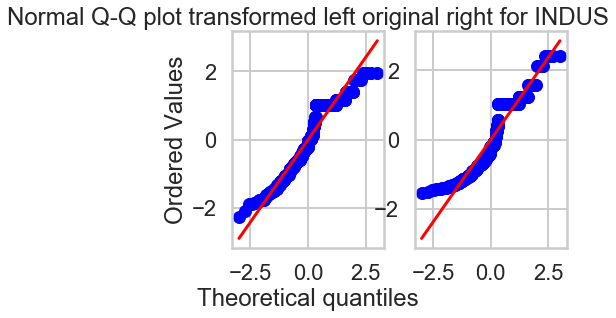

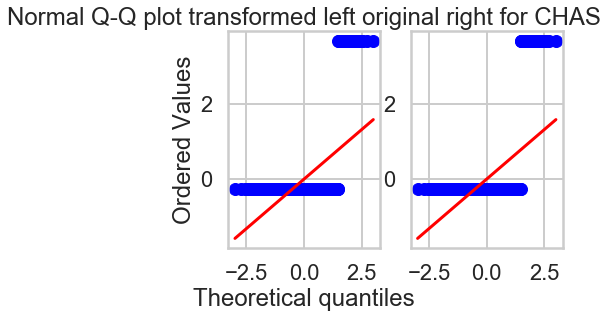

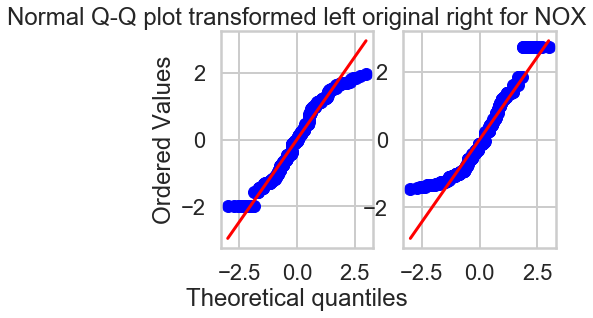

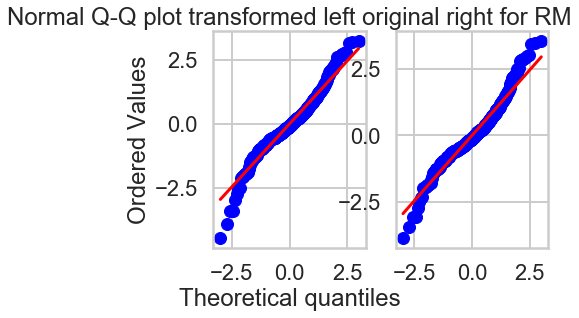

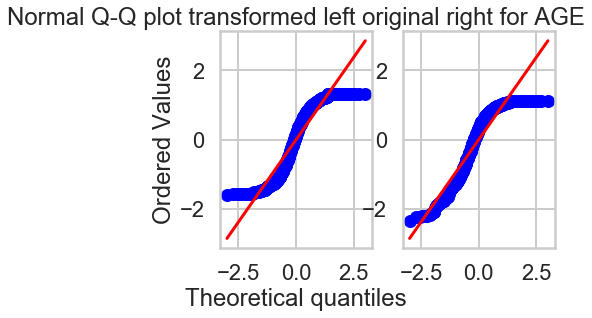

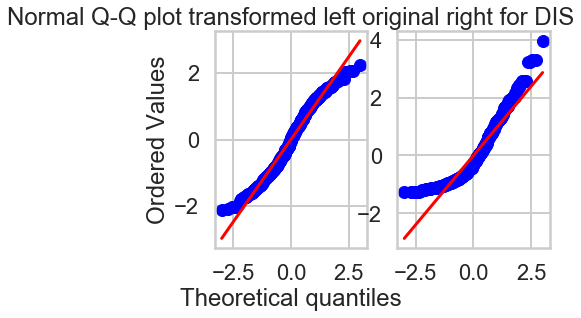

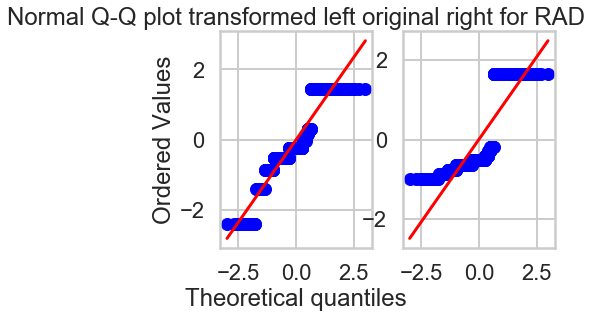

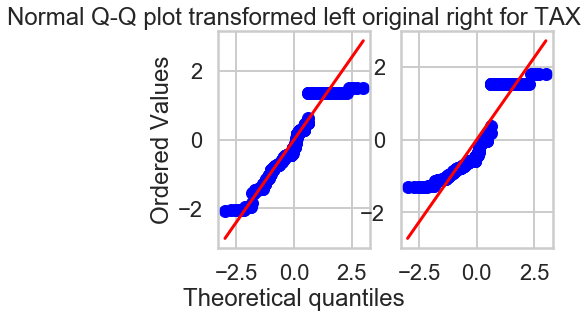

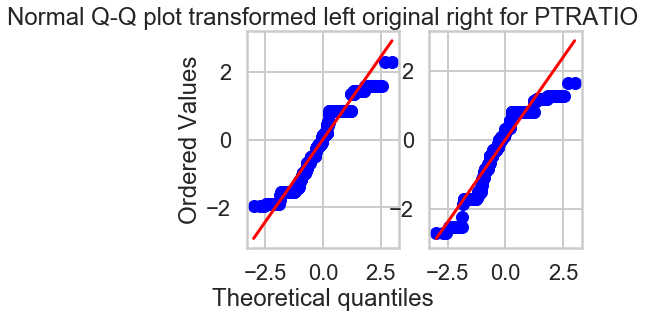

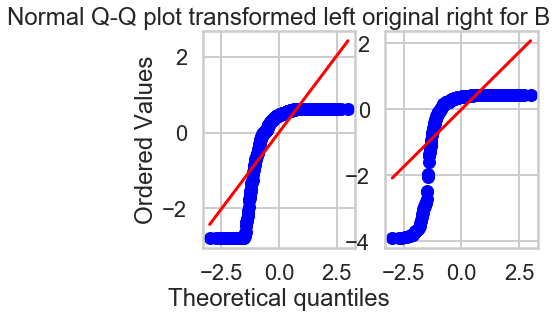

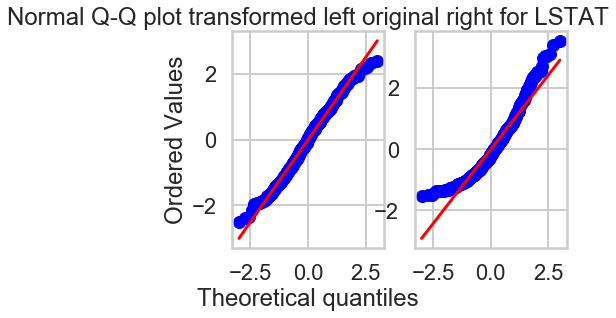

In [37]:
# We plot a Q-Q plot for each attribute in newX
for col in X.columns:
    newz = (newX[str(col)]-np.mean(newX[str(col)]))/np.std(newX[str(col)])
    z = (X[str(col)]-np.mean(X[str(col)]))/np.std(X[str(col)])
    plt.subplot(1,2,1)
    stats.probplot(newz, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot transformed left original right for " + str(col))
    plt.subplot(1,2,2)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [38]:
ranked_correlations = pd.DataFrame(columns=['corr','first','second','type'])
index = 0
for i in X.corr().index:
    for j in X.corr().keys():
        if i != j:
            if X.corr()[i][j] > 0:
                Type = 'positive'
            elif X.corr()[i][j] == 0:
                Type = 'none'
            else:
                Type = 'negative'
            ranked_correlations.loc[index] = [X.corr()[i][j], i, j, Type]
            index = index + 1
ranked_correlations['corr'] = ranked_correlations['corr'].abs()
ranked_correlations = ranked_correlations.sort_values(by=['corr'],ascending=False)
ranked_correlations = ranked_correlations.drop_duplicates(subset='corr', keep='first')
ranked_correlations.head(30)

,corr,first,second,type
104,0.910228,RAD,TAX,positive
54,0.769230,NOX,DIS,negative
27,0.763651,INDUS,NOX,positive
78,0.747881,AGE,DIS,negative
76,0.731470,AGE,NOX,positive
110,0.720760,TAX,INDUS,positive
30,0.708027,INDUS,DIS,negative
56,0.668023,NOX,TAX,positive
85,0.664408,DIS,ZN,positive
29,0.644779,INDUS,AGE,positive


In [39]:
combX = newX.copy()
combX['RADTAX'] = combX['RAD'] * combX['TAX']
combX['NOXDIS'] = combX['NOX'] * combX['DIS']
combX['NOXINDUS'] = combX['NOX'] * combX['INDUS']
combX['AGEDIS'] = combX['AGE'] * combX['DIS']
combX['NOXAGE'] = combX['NOX'] * combX['AGE']
combX['TAXINDUS'] = combX['TAX'] * combX['INDUS']
combX['INDUSDIS'] = combX['INDUS'] * combX['DIS']
combX['NOXTAX'] = combX['NOX'] * combX['TAX']
combX['ZNDIS'] = combX['ZN'] * combX['DIS']
combX['INDUSAGE'] = combX['INDUS'] * combX['AGE']
combX['CRIMRAD'] = combX['CRIM'] * combX['RAD']
combX['RMLSTAT'] = combX['RM'] * combX['LSTAT']
combX['NOXRAD'] = combX['NOX'] * combX['RAD']
combX['INDUSLSTAT'] = combX['INDUS'] * combX['LSTAT']
combX['AGELSTAT'] = combX['AGE'] * combX['LSTAT']
combX['INDUSRAD'] = combX['INDUS'] * combX['RAD']
combX['NOXLSTAT'] = combX['NOX'] * combX['LSTAT']
combX['TAXCRIM'] = combX['TAX'] * combX['CRIM']
combX['ZNAGE'] = combX['ZN'] * combX['AGE']
combX['TAXLSTAT'] = combX['TAX'] * combX['LSTAT']
combX['LSTATPTRATIO'] = combX['LSTAT'] * combX['PTRATIO']

combX['RAD/TAX'] = combX['RAD'] / combX['TAX']
combX['NOX/DIS'] = combX['NOX'] / combX['DIS']
combX['NOX/INDUS'] = combX['NOX'] / combX['INDUS']
combX['AGE/DIS'] = combX['AGE'] / combX['DIS']
combX['NOX/AGE'] = combX['NOX'] / combX['AGE']
combX['TAX/INDUS'] = combX['TAX'] / combX['INDUS']
combX['INDUS/DIS'] = combX['INDUS'] / combX['DIS']
combX['NOX/TAX'] = combX['NOX'] / combX['TAX']
combX['ZN/DIS'] = combX['ZN'] / combX['DIS']
combX['INDUS/AGE'] = combX['INDUS'] / combX['AGE']
combX['CRIM/RAD'] = combX['CRIM'] / combX['RAD']
combX['RM/LSTAT'] = combX['RM'] / combX['LSTAT']
combX['NOX/RAD'] = combX['NOX'] / combX['RAD']
combX['INDUS/LSTAT'] = combX['INDUS'] / combX['LSTAT']
combX['AGE/LSTAT'] = combX['AGE'] / combX['LSTAT']
combX['INDUS/RAD'] = combX['INDUS'] / combX['RAD']
combX['NOX/LSTAT'] = combX['NOX'] / combX['LSTAT']
combX['TAX/CRIM'] = combX['TAX'] / combX['CRIM']
combX['ZN/AGE'] = combX['ZN'] / combX['AGE']
combX['TAX/LSTAT'] = combX['TAX'] / combX['LSTAT']
combX['LSTAT/PTRATIO'] = combX['LSTAT'] / combX['PTRATIO']

combX['TAX/RAD'] = combX['TAX'] / combX['RAD']
combX['DIS/NOX'] = combX['DIS'] / combX['NOX']
combX['INDUS/NOX'] = combX['INDUS'] / combX['NOX']
combX['DIS/AGE'] = combX['DIS'] / combX['AGE']
combX['AGE/NOX'] = combX['AGE'] / combX['NOX']
combX['INDUS/TAX'] = combX['INDUS'] / combX['TAX']
combX['DIS/INDUS'] = combX['DIS'] / combX['INDUS']
combX['TAX/NOX'] = combX['TAX'] / combX['NOX']
combX['DIS/ZN'] = combX['DIS'] / combX['ZN']
combX['AGE/INDUS'] = combX['AGE'] / combX['INDUS']
combX['RAD/CRIM'] = combX['RAD'] / combX['CRIM']
combX['LSTAT/RM'] = combX['LSTAT'] / combX['RM']
combX['RAD/NOX'] = combX['RAD'] / combX['NOX']
combX['LSTAT/INDUS'] = combX['LSTAT'] / combX['INDUS']
combX['LSTAT/AGE'] = combX['LSTAT'] / combX['AGE']
combX['RAD/INDUS'] = combX['RAD'] / combX['INDUS']
combX['LSTAT/NOX'] = combX['LSTAT'] / combX['NOX']
combX['CRIM/TAX'] = combX['CRIM'] / combX['TAX']
combX['AGE/ZN'] = combX['AGE'] / combX['ZN']
combX['LSTAT/TAX'] = combX['LSTAT'] / combX['TAX']
combX['PTRATIO/LSTAT'] = combX['PTRATIO'] / combX['LSTAT']

In [40]:
combX.join(bos.PRICE).corr().abs().nlargest(40,['PRICE'])['PRICE']

PRICE           1.000000
RM/LSTAT        0.835216
TAX/LSTAT       0.810900
TAXLSTAT        0.805342
LSTAT           0.803443
LSTAT/TAX       0.800473
LSTAT/RM        0.798081
RMLSTAT         0.760321
NOX/LSTAT       0.735937
LSTAT/NOX       0.707273
INDUSLSTAT      0.702770
LSTATPTRATIO    0.691359
RM              0.676939
AGELSTAT        0.582885
NOXLSTAT        0.567026
PTRATIO         0.511193
TAXINDUS        0.510717
INDUS           0.507810
INDUS/NOX       0.506042
INDUS/TAX       0.504474
TAX/INDUS       0.497655
NOX/INDUS       0.490399
TAX             0.473254
INDUSAGE        0.461752
INDUSRAD        0.454954
DIS/ZN          0.447040
CRIMRAD         0.446940
CRIM/TAX        0.441621
CRIM            0.440974
TAXCRIM         0.440313
NOX/TAX         0.436672
TAX/NOX         0.436018
NOX             0.428083
AGE/NOX         0.425828
NOXTAX          0.418435
ZN/DIS          0.417171
RAD/NOX         0.408586
CRIM/RAD        0.408584
DIS/INDUS       0.403561
AGE             0.391466


<p>We saw that combining the most highly correlated variables the top 7 most correlated without repeating any component variable and without resulting in arrays with infinity values are: RM/LSTAT, PTRATIO, TAXINDUS, ZN/DIS, CRIMRAD, NOX, AGE we will reduce combX to those variables for further study</p>

In [41]:
combX = combX[['RM/LSTAT', 'PTRATIO', 'TAXINDUS', 'ZN/DIS', 'CRIMRAD', 'NOX', 'AGE']]
sum(np.isinf(combX['ZN/DIS']))

0

In [42]:
from sklearn.preprocessing import StandardScaler
combXcolumns = combX.keys()
scaler = StandardScaler()
combX = scaler.fit_transform(combX)
newXcolumns = newX.keys()
scaler = StandardScaler()
newX = scaler.fit_transform(newX)
combX = pd.DataFrame(combX,columns=combXcolumns)
newX = pd.DataFrame(newX,columns=newXcolumns)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [43]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280361344


In [44]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [45]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [46]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

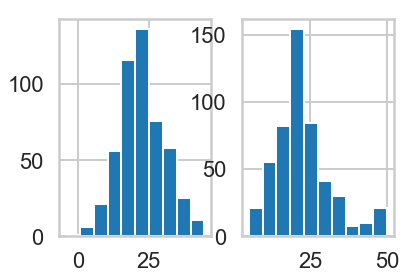

In [47]:
# your turn
plt.subplot(1,2,1)
plt.hist(lm.predict(X))
plt.subplot(1,2,2)
plt.hist(bos.PRICE)
#plt.subplot(1,1,2)
#plt.scatter(lm.predict(X),bos.PRICE)

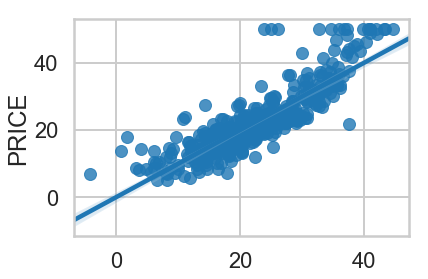

In [48]:
sns.regplot(lm.predict(X),bos.PRICE)

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

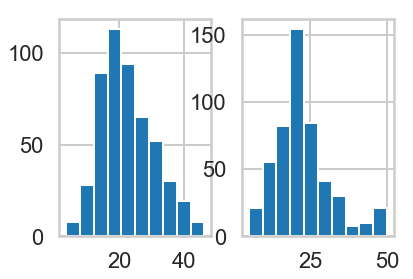

In [49]:
lmnew = LinearRegression()
lmnew.fit(newX,bos.PRICE)
plt.subplot(1,2,1)
plt.hist(lmnew.predict(newX))
plt.subplot(1,2,2)
plt.hist(bos.PRICE)

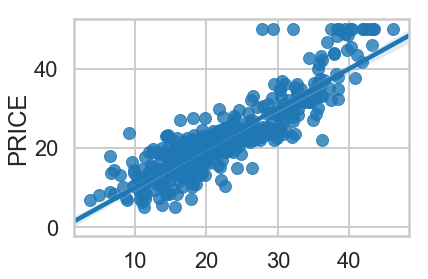

In [50]:
sns.regplot(lmnew.predict(newX),bos.PRICE)

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

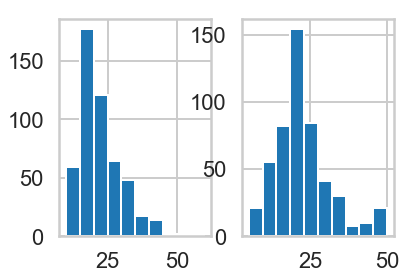

In [51]:
lmcomb = LinearRegression()
lmcomb.fit(combX,bos.PRICE)
plt.subplot(1,2,1)
plt.hist(lmcomb.predict(combX))
plt.subplot(1,2,2)
plt.hist(bos.PRICE)

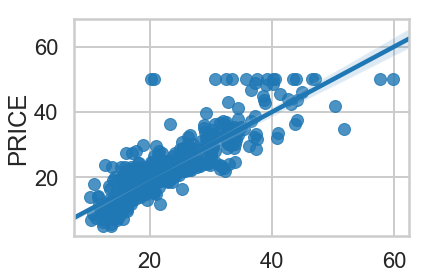

In [52]:
sns.regplot(lmcomb.predict(combX),bos.PRICE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffa44ad4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffa44ade10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffa44cae80>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffa44b3780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffa44b3c18>],
 'means': []}

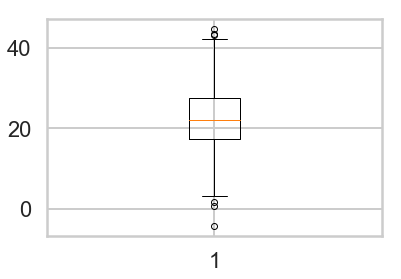

In [53]:
plt.boxplot(lm.predict(X))

Text(0,0.5,'')

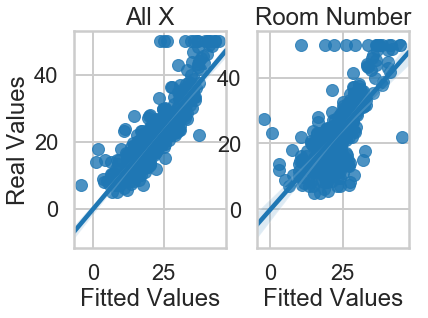

In [54]:
plt.subplot(1,2,1)
sns.regplot(lm.predict(X), bos.PRICE)
plt.title("All X")
plt.xlabel("Fitted Values")
plt.ylabel("Real Values")
plt.subplot(1,2,2)
sns.regplot(m.fittedvalues, bos.PRICE)
plt.title("Room Number")
plt.xlabel("Fitted Values")
plt.ylabel("")

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [55]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))
print(np.sum((bos.PRICE - lmnew.predict(newX)) ** 2))
print(np.sum((bos.PRICE - lmcomb.predict(combX)) ** 2))

11080.2762841
9626.82740355
11377.3985357


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [56]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))
print(np.sum((lmnew.predict(newX) - np.mean(bos.PRICE)) ** 2))
print(np.sum((lmcomb.predict(combX) - np.mean(bos.PRICE)) ** 2))

31636.0191309
33089.4680115
31338.8968794


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [57]:
# your turn
mptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(mptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.61e-34
Time:                        15:33:56   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [58]:
#RSS
def rss(X, y, lm):
    rss = np.sum((y - lm.predict(X)) ** 2)
    return rss
#ESS
def ess(X, y, lm):
    ess = np.sum((lm.predict(X) - np.mean(y)) ** 2)
    return ess
#TSS = RSS+ESS
def tss(X, y, lm):
    tss = rss(X, y, lm) + ess(X, y, lm)
    return tss
#Rsquared = ESS/TSS
def rsquared(X, y, lm):
    rsquared = ess(X, y, lm) / tss(X, y, lm)
    return rsquared
#Rsquaredadjusted R2−(1−R2)K/N−K−1
def rsquaredadj(X, y, lm):
    rsquaredadj = rsquared(X, y, lm)-(1-rsquared(X, y, lm))*(len(X.keys())/(len(X)-len(X.keys())-1))
    return rsquaredadj
#MSE = RSS/(N-K-1)
def mse(X, y, lm):
    mse = rss(X, y, lm)/(len(X)-len(X.keys())-1)
    return mse
#MSR = ESS/K
def msr(X, y, lm):
    msr = ess(X, y, lm)/len(X.keys())
    return msr
#F = MSR/MSE
def f(X, y, lm):
    f = msr(X, y, lm)/mse(X, y, lm)
    return f
#Fcomp = (RSSreduced−RSSfull/DFreduced−DFfull)/(RSSfullDFfull)
def fcomp(Xfull, Xred, y, lmfull, lmred):
    fcomp = ((rss(Xred,y,lmred)-rss(Xfull,y,lmfull))/((len(Xred)-len(Xred.keys())-1)-(len(Xfull)-len(Xfull.keys())-1)))/(rss(Xfull,y,lmfull)*(len(Xfull)-len(Xfull.keys())-1))
    return fcomp

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [59]:
# your turn
lmred = LinearRegression()
lmnewred = LinearRegression()
lmred.fit(X[['CRIM','RM','PTRATIO']],bos.PRICE)
lmnewred.fit(newX[['CRIM','RM','PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
#RSS
redrss = rss(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredrss = rss(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#ESS
redess = ess(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredess = ess(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#TSS = RSS+ESS
redtss = tss(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredtss = tss(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#Rsquared = ESS/TSS
redr2 = rsquared(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredr2 = rsquared(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#Rsquaredadjusted R2−(1−R2)K/N−K−1
redr2adj = rsquaredadj(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredr2adj = rsquaredadj(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#MSE = RSS/(N-K-1)
redmse = mse(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredmse = mse(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#MSR = ESS/K
redmsr = msr(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredmsr = msr(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#F = MSR/MSE
redf = f(X[['CRIM','RM','PTRATIO']],bos.PRICE,lmred)
newredf = f(newX[['CRIM','RM','PTRATIO']],bos.PRICE,lmnewred)
#
print(redr2adj,newredr2adj)
print(redf,newredf)

0.590984359228 0.563115021471
244.223870239 217.970217043


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

<p>LSTAT and INDUS would be good variables to add as they have a high correlation with the housing price and as seen in the data preparation phase they have a reasonably low correlation among themselves, except for RM and LSTAT in which case it might be better to replace RM with LSTAT since it correlates better.</p>

<p>We will work from now on with the skew transformed variables since we have clearly demostrated them to be superior.</p>

In [61]:
# your turn
lmnewred2 = LinearRegression()
lmnewrede = LinearRegression()
lmnewred2.fit(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE)
lmnewrede.fit(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#RSS
newred2rss = rss(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newrederss = rss(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#ESS
newred2ess = ess(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newredeess = ess(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#TSS = RSS+ESS
newred2tss = tss(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newredetss = tss(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#Rsquared = ESS/TSS
newred2r2 = rsquared(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newreder2 = rsquared(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#Rsquaredadjusted R2−(1−R2)K/N−K−1
newred2r2adj = rsquaredadj(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newreder2adj = rsquaredadj(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#MSE = RSS/(N-K-1)
newred2mse = mse(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newredemse = mse(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#MSR = ESS/K
newred2msr = msr(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newredemsr = msr(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#F = MSR/MSE
newred2f = f(newX[['CRIM','RM','PTRATIO','LSTAT','INDUS']],bos.PRICE,lmnewred2)
newredef = f(newX[['LSTAT','CRIM','PTRATIO']],bos.PRICE,lmnewrede)
#
print(newred2r2adj,newreder2adj)
print(newred2f,newredef)

0.714429353819 0.684893690403
253.677807404 366.877909687


In [66]:
import itertools
def dimensionality_parameter_finder(X,y):
    keys = list(X.join(y).corr().abs().nlargest(8,[list(X.join(y).keys())[0]])[list(X.join(y).keys())[0]].keys())[1:]
    r2adjdict = {}
    fdict = {} 
    for p in list(itertools.permutations(keys)):
        for i in range(len(keys)):
            if i < (len(keys)-1):
                lm = LinearRegression()
                lm.fit(X[list(p)[:len(keys)-i]],y)
                r2adjdict[''.join(list(p)[:len(keys)-i])] = rsquaredadj(X[list(p)[:len(keys)-i]],y,lm)
                fdict[''.join(list(p)[:len(keys)-i])] = f(X[list(p)[:len(keys)-i]],y,lm)
    for key, number in r2adjdict.items():
        if number == min(r2adjdict.values()):
            print('The combination of parameters', key, 'yielded the best adjusted rsquared value at', number)
    for key, number in fdict.items():
        if number == min(fdict.values()):
            print('The combination of parameters', key, 'yeielded the best f statistic value at', number) 

In [67]:
dimensionality_parameter_finder(newX,bos.PRICE)

The combination of parameters RADDIS yielded the best adjusted rsquared value at 0.125611754411
The combination of parameters RADDIS yeielded the best f statistic value at 37.2733238339


(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

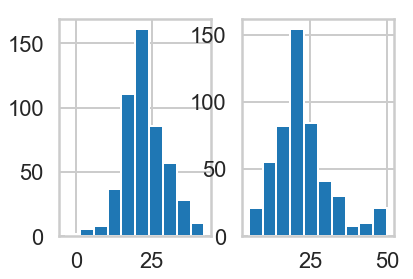

In [74]:
lmraddis = LinearRegression()
lmraddis.fit(newX[['RM','CRIM','PTRATIO']],bos.PRICE)
plt.subplot(1,2,1)
plt.hist(lmraddis.predict(newX[['RM','CRIM','PTRATIO']]))
plt.subplot(1,2,2)
plt.hist(bos.PRICE)

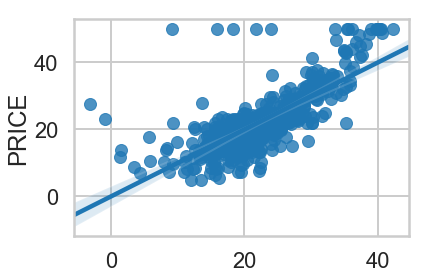

In [75]:
sns.regplot(lmraddis.predict(newX[['RM','CRIM','PTRATIO']]),bos.PRICE)


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Text(0,0.5,'Residuals')

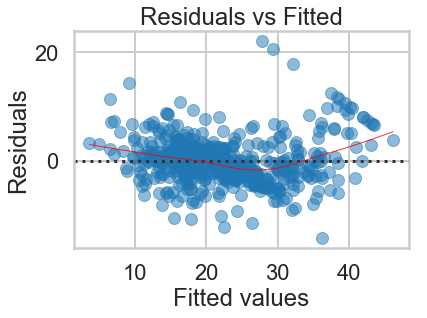

In [134]:
# Your turn.
import statsmodels.api as sm

# generate OLS model
model = sm.OLS(bos.PRICE, sm.add_constant(newX))
model_fit = model.fit()
model2 = sm.OLS(bos.PRICE, sm.add_constant(X))
model_fit2 = model2.fit()
model3 = sm.OLS(newYout, sm.add_constant(newXout))
model_fit3 = model3.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([newX, bos.PRICE], axis=1)
dataframe2 = pd.concat([X, bos.PRICE], axis=1)
dataframe3 = pd.concat([newXout, newYout], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
model_fitted_y2 = model_fit2.fittedvalues
model_fitted_y3 = model_fit3.fittedvalues

# model residuals
model_residuals = model_fit.resid
model_residuals2 = model_fit2.resid
model_residuals3 = model_fit3.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model_norm_residuals2 = model_fit2.get_influence().resid_studentized_internal
model_norm_residuals3 = model_fit3.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_norm_residuals_abs_sqrt2 = np.sqrt(np.abs(model_norm_residuals2))
model_norm_residuals_abs_sqrt3 = np.sqrt(np.abs(model_norm_residuals3))

# absolute residuals
model_abs_resid = np.abs(model_residuals)
model_abs_resid2 = np.abs(model_residuals2)
model_abs_resid3 = np.abs(model_residuals3)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
model_leverage2 = model_fit2.get_influence().hat_matrix_diag
model_leverage3 = model_fit3.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]
model_cooks2 = model_fit2.get_influence().cooks_distance[0]
model_cooks3 = model_fit3.get_influence().cooks_distance[0]


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Text(0,0.5,'Standardized Residuals')

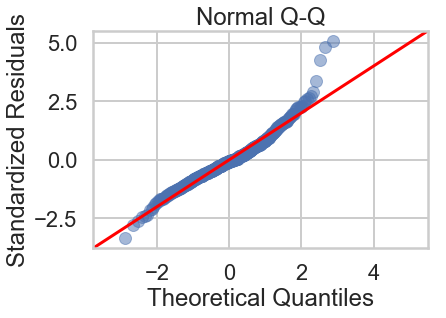

In [93]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')


Text(0,0.5,'Standardized Residuals')

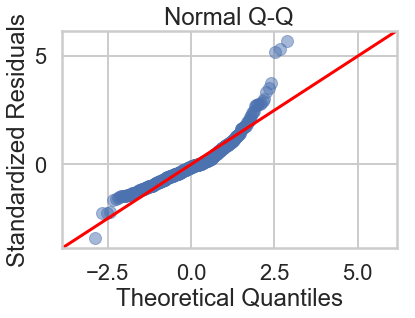

In [108]:
QQ = ProbPlot(model_norm_residuals2)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

Text(0,0.5,'Standardized Residuals')

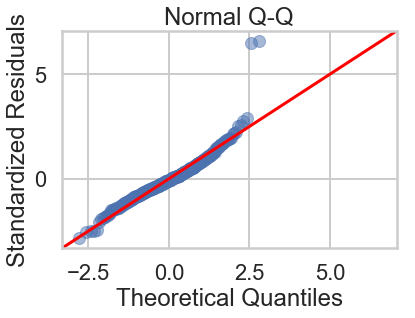

In [135]:
QQ = ProbPlot(model_norm_residuals3)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

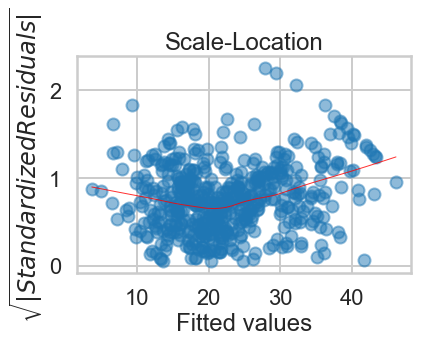

In [109]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

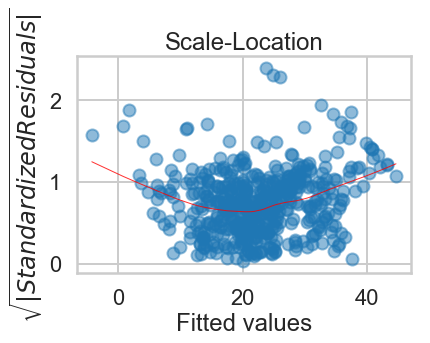

In [121]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y2, model_norm_residuals_abs_sqrt2, alpha=0.5)
sns.regplot(model_fitted_y2, model_norm_residuals_abs_sqrt2, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

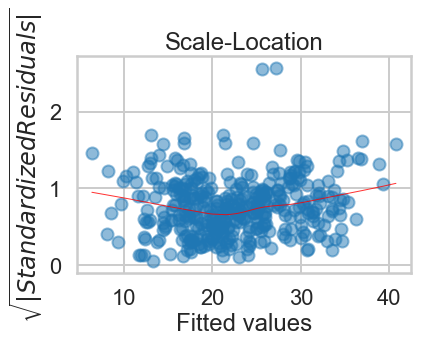

In [136]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y3, model_norm_residuals_abs_sqrt3, alpha=0.5)
sns.regplot(model_fitted_y3, model_norm_residuals_abs_sqrt3, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Text(0,0.5,'Standardized Residuals')

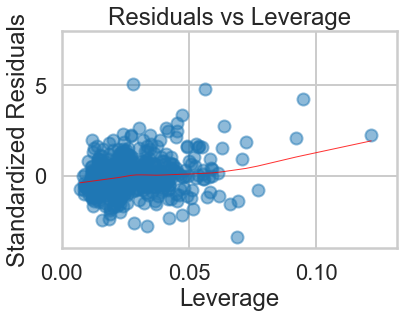

In [140]:
plot_lm_4 = plt.figure()
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

Text(0,0.5,'Standardized Residuals')

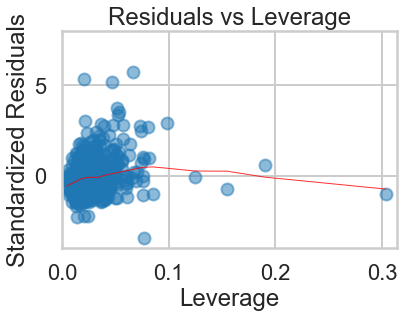

In [139]:
plot_lm_4 = plt.figure()
plt.scatter(model_leverage2, model_norm_residuals2, alpha=0.5)
sns.regplot(model_leverage2, model_norm_residuals2, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage2)+0.01)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

Text(0,0.5,'Standardized Residuals')

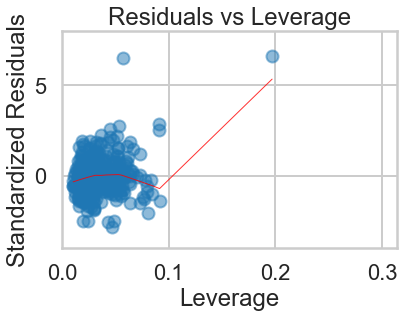

In [138]:
plot_lm_4 = plt.figure()
plt.scatter(model_leverage3, model_norm_residuals3, alpha=0.5)
sns.regplot(model_leverage3, model_norm_residuals3, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage2)+0.01)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

In [127]:
newbos = newX.join(bos.PRICE)
z = np.abs(stats.zscore(newbos))
print(z)
threshold = 3
print(np.where(z > 3))
Q1 = newX.quantile(0.25)
Q3 = newX.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

[[ 2.50132907  1.60526992  1.50353344 ...,  0.63275672  1.25709923
   0.15968566]
 [ 1.4560907   0.59995411  0.45613306 ...,  0.63275672  0.33442163
   0.10152429]
 [ 1.45657141  0.59995411  0.45613306 ...,  0.50206489  1.54345266
   1.32424667]
 ..., 
 [ 0.95463378  0.59995411  0.27491478 ...,  0.63275672  1.08007767
   0.14880191]
 [ 0.61304964  0.59995411  0.27491478 ...,  0.52173322  0.87516238
   0.0579893 ]
 [ 1.10533737  0.59995411  0.27491478 ...,  0.63275672  0.57335234
   1.15724782]]
(array([142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216,
       218, 219, 220, 221, 222, 225, 234, 236, 257, 269, 273, 274, 276,
       277, 282, 283, 356, 357, 358, 363, 364, 364, 365, 367, 369, 370,
       372, 374, 406], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 3, 3, 5, 5], dtype=int64))
CRIM       1.781758
ZN         2.145449
INDUS      1.817194
CHAS       0.000000
NOX        

In [128]:
boston_df_out = newbos[~((newbos < (Q1 - 1.5 * IQR)) |(newbos > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(384, 14)

In [129]:
boston_df_out

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-2.501329,1.605270,-1.503533,-0.272599,-0.050498,0.441377,-0.360476,0.445390,-2.406060,-0.556196,-1.408874,0.632757,-1.257099,24.0
1,-1.456091,-0.599954,-0.456133,-0.272599,0.699621,0.225621,0.212380,0.789572,-1.413340,-1.175882,-0.518692,0.632757,-0.334422,21.6
2,-1.456571,-0.599954,-0.456133,-0.272599,0.699621,1.268348,-0.510738,0.789572,-1.413340,-1.175882,-0.518692,0.502065,-1.543453,34.7
3,-1.345635,-0.599954,-1.543428,-0.272599,0.840093,1.019336,-0.985340,1.131872,-0.876178,-1.461996,-0.076443,0.559404,-1.934975,33.4
4,-0.878596,-0.599954,-1.543428,-0.272599,0.840093,1.218056,-0.741593,1.131872,-0.876178,-1.461996,-0.076443,0.632757,-1.161275,36.2
5,-1.398033,-0.599954,-1.543428,-0.272599,0.840093,0.238312,-0.594169,1.131872,-0.876178,-1.461996,-0.076443,0.543084,-1.193613,28.7
6,-0.735549,1.545495,-0.321512,-0.272599,0.085725,-0.362284,-0.306933,0.984760,-0.241835,-0.413875,-1.435746,0.590606,0.187963,22.9
7,-0.460465,1.545495,-0.321512,-0.272599,0.085725,-0.129641,1.085808,1.100368,-0.241835,-0.413875,-1.435746,0.632757,0.983125,27.1
8,-0.259084,1.545495,-0.321512,-0.272599,0.085725,-0.930893,1.307731,1.137415,-0.241835,-0.413875,-1.435746,0.310063,1.878617,16.5
9,-0.373184,1.545495,-0.321512,-0.272599,0.085725,-0.374009,0.547126,1.272704,-0.241835,-0.413875,-1.435746,0.312487,0.767995,18.9


In [132]:
newXout = boston_df_out.drop('PRICE', axis=1)
newYout = boston_df_out.PRICE

(array([  10.,   29.,   57.,  135.,   74.,   36.,   26.,    6.,    7.,    4.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

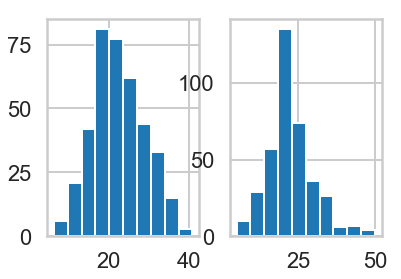

In [141]:
lmout = LinearRegression()
lmout.fit(newXout,newYout)
plt.subplot(1,2,1)
plt.hist(lmout.predict(newXout))
plt.subplot(1,2,2)
plt.hist(newYout)

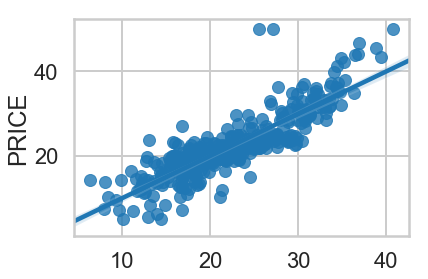

In [142]:
sns.regplot(lmout.predict(newXout),newYout)

(array([  10.,   29.,   57.,  135.,   74.,   36.,   26.,    6.,    7.,    4.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

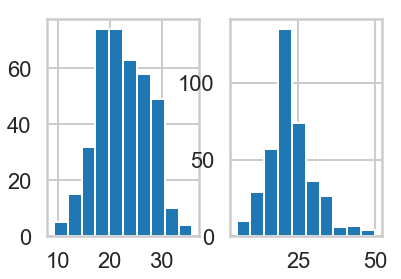

In [152]:
from sklearn.linear_model import ElasticNet
net = ElasticNet(random_state=0, l1_ratio=1)
net.fit(newXout,newYout)
plt.subplot(1,2,1)
plt.hist(net.predict(newXout))
plt.subplot(1,2,2)
plt.hist(newYout)

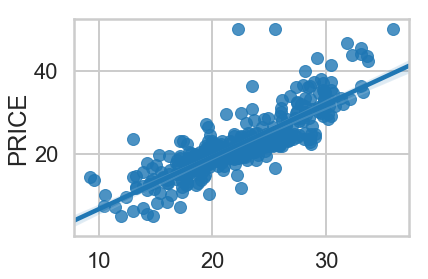

In [155]:
sns.regplot(net.predict(newXout),newYout)

(array([  10.,   29.,   57.,  135.,   74.,   36.,   26.,    6.,    7.,    4.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

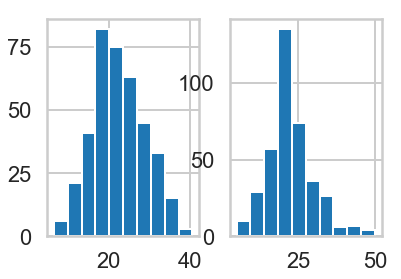

In [153]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(newXout,newYout)
plt.subplot(1,2,1)
plt.hist(ridge.predict(newXout))
plt.subplot(1,2,2)
plt.hist(newYout)

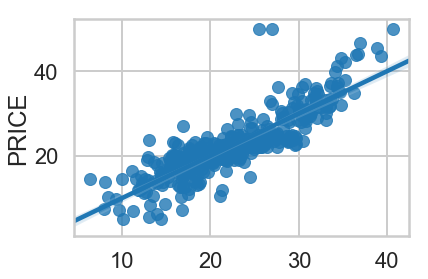

In [156]:
sns.regplot(ridge.predict(newXout),newYout)

(array([  10.,   29.,   57.,  135.,   74.,   36.,   26.,    6.,    7.,    4.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

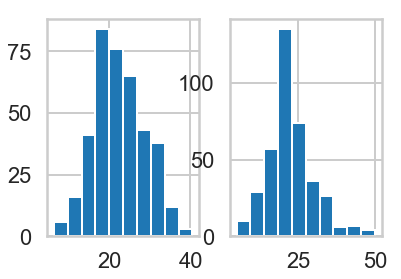

In [154]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(newXout,newYout)
plt.subplot(1,2,1)
plt.hist(lasso.predict(newXout))
plt.subplot(1,2,2)
plt.hist(newYout)

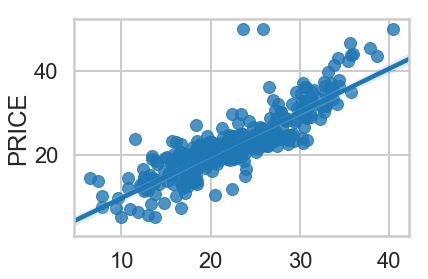

In [157]:
sns.regplot(lasso.predict(newXout),newYout)